In [1]:
# Task 1: BFS and DFS on a simple graph

from collections import deque

# Sample graph (adjacency list)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Breadth-First Search (BFS)
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    print("BFS Traversal:")
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            queue.extend(graph[node])

# Depth-First Search (DFS)
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
        print("DFS Traversal:")
    if start not in visited:
        print(start, end=' ')
        visited.add(start)
        for neighbor in graph[start]:
            dfs(graph, neighbor, visited)

bfs(graph, 'A')
print("\n")
dfs(graph, 'A')


BFS Traversal:
A B C D E F 

DFS Traversal:
A B D E F C 

Task 2

      Size  BFS Time (s)  DFS Time (s)
0     1000      0.000401      0.000261
1    40000      0.026108      0.006743
2    80000      0.051207      0.014915
3   200000      0.124658      0.092171
4  1000000      0.673278      0.534473


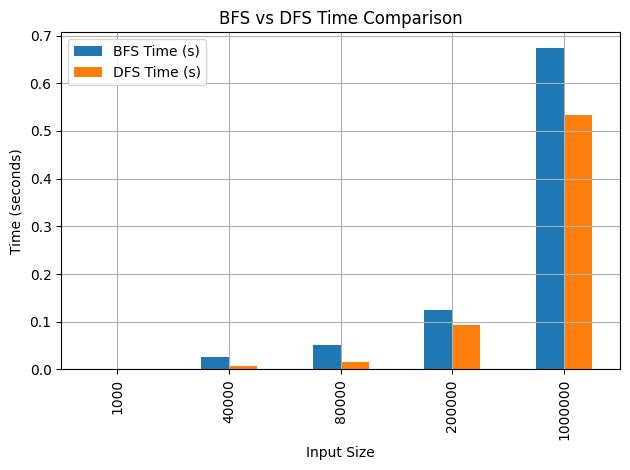

In [2]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# BFS and DFS for tree stored as list
def bfs_tree(tree, goal):
    queue = deque([0])
    visited = set()
    while queue:
        index = queue.popleft()
        if index in visited or index >= len(tree):
            continue
        visited.add(index)
        if tree[index] == goal:
            return True
        left = 2 * index + 1
        right = 2 * index + 2
        queue.extend([left, right])
    return False

def dfs_tree(tree, goal):
    stack = [0]
    visited = set()
    while stack:
        index = stack.pop()
        if index in visited or index >= len(tree):
            continue
        visited.add(index)
        if tree[index] == goal:
            return True
        right = 2 * index + 2
        left = 2 * index + 1
        stack.extend([right, left])
    return False

sizes = [1000, 40000, 80000, 200000, 1000000]
bfs_times = []
dfs_times = []

for size in sizes:
    data = random.sample(range(size * 10), size)
    goal = data[-220]  # list[total_len - 220]

    # Time BFS
    start_bfs = time.time()
    bfs_tree(data, goal)
    end_bfs = time.time()
    bfs_times.append(end_bfs - start_bfs)

    # Time DFS
    start_dfs = time.time()
    dfs_tree(data, goal)
    end_dfs = time.time()
    dfs_times.append(end_dfs - start_dfs)

# Create DataFrame
df = pd.DataFrame({
    'Size': sizes,
    'BFS Time (s)': bfs_times,
    'DFS Time (s)': dfs_times
})

print(df)

# Plot Bar Chart
df.plot(x='Size', y=['BFS Time (s)', 'DFS Time (s)'], kind='bar')
plt.title('BFS vs DFS Time Comparison')
plt.ylabel('Time (seconds)')
plt.xlabel('Input Size')
plt.grid(True)
plt.tight_layout()
plt.show()


Task 3


In [3]:
# Task 3: City Map - Find shortest path using BFS

city_graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])
    visited = set()
    while queue:
        path = queue.popleft()
        city = path[-1]
        if city == goal:
            return path
        elif city not in visited:
            for neighbor in graph[city]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
            visited.add(city)

path = bfs_shortest_path(city_graph, 'Islamabad', 'Karachi')
print("Shortest path from Islamabad to Karachi:", " → ".join(path))


Shortest path from Islamabad to Karachi: Islamabad → Rawalpindi → Quetta → Karachi
